## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# create dataframe from file and observe information about it
import pandas as pd

credit_scoring = '/content/drive/My Drive/Yandex_Practicum_DataScience/Project1/credit_scoring_eng.csv'
df = pd.read_csv(credit_scoring)
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
# determine number of null values in columns
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [ ]:
# get sense of data by observing first 10 rows
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [ ]:
# observe values for each column and their count
for col in df.columns:
  print(df[col].value_counts())
  print()
  print()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


-986.927316     1
-7026.359174    1
-4236.274243    1
-6620.396473    1
-1238.560080    1
               ..
-2849.351119    1
-5619.328204    1
-448.829898     1
-1687.038672    1
-582.538413     1
Name: days_employed, Length: 19351, dtype: int64


35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


seco

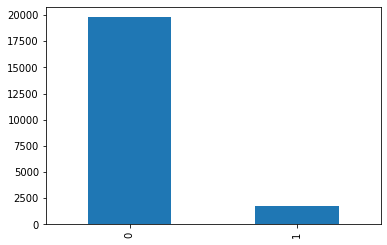

In [ ]:
# discrete variable, debt, plotted in bar chart to
# observe data patterns and outliers for columns with numeric values

df['debt'].value_counts().plot(kind='bar')

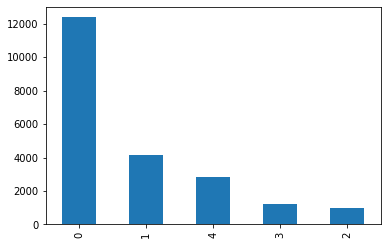

In [ ]:
# discrete variable, family_status_id, plotted in bar chart to
# observe data patterns and outliers for columns with numeric values

df['family_status_id'].value_counts().plot(kind='bar')

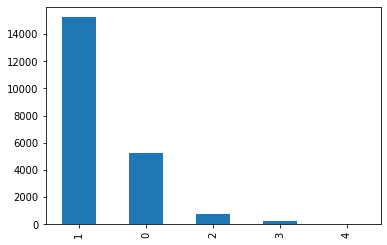

In [ ]:
# discrete variable, education_id, plotted in bar chart to
# observe data patterns and outliers for columns with numeric values

df['education_id'].value_counts().plot(kind='bar')

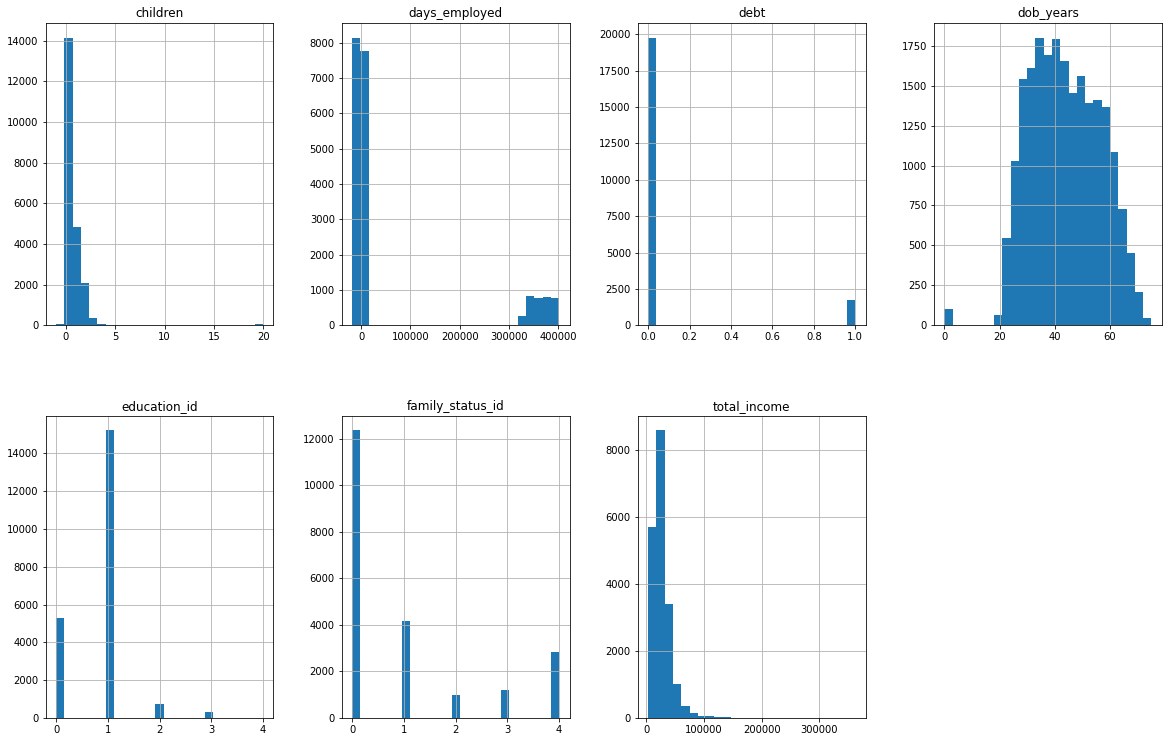

In [ ]:
# observe data patterns an outliers for columns with numeric values
hist = df.hist(figsize=(20,20),bins=25,layout=(3,4))

In [ ]:
# Percentage of Negative Values for Numerical Columns
for col in df.columns:
  if df[col].dtypes != 'object':
    neg_perc = df[df[col] <0][col].count() / df[col].count()
    print('percent of data entered with negative value for',col,':{:%}'.format(neg_perc))
    print()


percent of data entered with negative value for children :0.218351%

percent of data entered with negative value for days_employed :82.197302%

percent of data entered with negative value for dob_years :0.000000%

percent of data entered with negative value for education_id :0.000000%

percent of data entered with negative value for family_status_id :0.000000%

percent of data entered with negative value for debt :0.000000%

percent of data entered with negative value for total_income :0.000000%



In [ ]:

print('Percentage of data entries with Age 0: {:%}'.format(df[df['dob_years'] == 0]['dob_years'].count() / df['dob_years'].count()))

Percentage of data entries with Age 0: 0.469222%


In [ ]:
# check to see if family_status and family_status_id match up

print(df.pivot_table(index='family_status',
               values='family_status_id').sort_values(by = 'family_status_id').reset_index())

       family_status  family_status_id
0            married                 0
1  civil partnership                 1
2    widow / widower                 2
3           divorced                 3
4          unmarried                 4


In [ ]:
# check to see if education and education_id match up

print(df.pivot_table(index='education',
               values='education_id').sort_values('education_id').reset_index())

              education  education_id
0     BACHELOR'S DEGREE             0
1     Bachelor's Degree             0
2     bachelor's degree             0
3   SECONDARY EDUCATION             1
4   Secondary Education             1
5   secondary education             1
6          SOME COLLEGE             2
7          Some College             2
8          some college             2
9     PRIMARY EDUCATION             3
10    Primary Education             3
11    primary education             3
12      GRADUATE DEGREE             4
13      Graduate Degree             4
14      graduate degree             4


### Client:
 - a Senior Manager or Vice President of bank's loan division
 - data analysis and reports team that will create credit scoring system

### Objective:
To determine whether a customer's ability to repay a loan is affected by:
   - marital status
   - number of children
 
### Purpose:
This report will be considered when building credit scoring of potential customers

###General Questions at first glance of data file:
DATA QUESTIONS
 - Who is providing data to me?
 - Who do I ask if I have questions about data?
 - Who collected data?
 - When was data collected?
 - How was data collected and inputed into system?

BUSINESS QUESTIONS
 - When were the loans given?
 - What length of period is each loan repayment for?
 - Is each row of data by primary loan applicant or does it include each loan applicant? Can there be multiple applicants for the same loan in this data file?
 - Did personal conditions/ situation change for loan applicants during the period of the loan?
 - Did economic factors/ environment change during the loan repayment period?
 - Where are loan applicants from? Do they all have same currency? geography? laws- for consumer rights and repayment terms?

### Specific Observations about Data
Pandas library is used to create tables, use csv file and perform calculations and visualizations.

Upon running info() on dataframe and value_counts() on each column, the following observations are made:
 - 2 columns contain Null values: days_employed and total_income.  There seems to be a correlation that whichever row has NaN value for days_employed also has NaN value for total_income.
 - family id (integer) maps to family status (a string)
 - education id (integer) maps to education ( a string)
 - income_type (a string) does not have an associated integer id
 - purpose (a string) does not have an associated integer id

#### children
 - has 47 records with value of -1. 0.218351% are with value -1. This is a very small amount, so calculations based on other, valid children values should be fine.  Difficult to determine why this value was entered and what correct value should be. It is quite possible it is possible to be a human error or a system error.

 - has 76 values for families with 20 children. 0.353078% of data is "20" children. This is a very small amount, so calculations based on other, valid children values should be fine. Difficult to determine why this value was entered and what correct value should be. It is quite possible to be either a human error or a system error.
 

#### days_employed
- is a float datatype, not integer
- what do negative values for days employed mean - unemployed? - mistakenly marked negative?
 - 82.197302% of values are negative. This is very inaccurate and compromises the validity of analysis with values in this column.
 - Difficult to determine why data has errors; could be system error in the process of digitization, migration, manipulation.
- very broad range; should categorize into ranges when values valid.

#### dob_years
 - has values of 0 years old, but small percentage: 0.469222%
 - very broad range; should categorize into ranges
 - the label does not describe data accurately - 'age' would have been better choice. But since this data may be part of larger credit scoring system, I will keep column values as given. 

#### education
 - has duplicate entries due to capitalization differences. This may be human or system error when data was digitized.
 - seems to be correctly associated with education_id. This will be determined once duplicate entries have been eliminated.

#### education_id
 - correctly associated with education


#### family status
 - correctly associated with family_id

#### family_id
 - correctly associated with family_status


#### gender
 - string object with values M or F
 - 1 unknown value "XNA"; very inconsequential and will not affect validity of anaysis on gender values.
 - raises possibility that applicant may be transgender and that perhaps there should be a third value for this column.  Also raises business question on whether there should be a fourth value - not shared/private.

#### income_type
 - seems straightforward
 - large majority of applicants fall into 4 out of 8 categories of income type.

#### debt
 - seems straightforward
 - Values are 0 or 1; integer data type

#### total_income
 - has many unique values
 - ranges should be created to analyze more effectively

#### purpose
 - contains multiple duplicate values, phrased differently. This may be human error where no standard phrase was selected for purpose. Instead, perhaps a text box instead of drop down box was used for online application form. 
 - values need to be converted and reduced to more accurately assess values

### Step 2. Data preprocessing

### Processing missing values

In [ ]:
# observe current null values
df.isna().sum()



children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [ ]:
# converting invalid data into NaN since
# - calculations are necessary on this column and
# - can not use 0 as a substitute for NaN since 0 is a valid value itself 

df['children'] = df['children'].replace(-1,float("NaN"))
df['children'] = df['children'].replace(20,(float("NaN")))
df['children'].value_counts()

0.0    14149
1.0     4818
2.0     2055
3.0      330
4.0       41
5.0        9
Name: children, dtype: int64

In [ ]:
# observe change in null values
df['children'].isna().sum()



123

In [ ]:
# check if space is entered as a value in string columns

for index, item in df.dtypes.items():
  if item == 'object':
    print(df[index].str.isspace().value_counts())


False    21525
Name: education, dtype: int64
False    21525
Name: family_status, dtype: int64
False    21525
Name: gender, dtype: int64
False    21525
Name: income_type, dtype: int64
False    21525
Name: purpose, dtype: int64


### Conclusion

## Identify and fill in missing values.
### which missing values you identified
### possible reasons these missing values were present
  * **children** - missing values where -1, 20 entered. Total 123 / 21525 rows.
    * If we eliminate those rows, values in other columns may be important and thus not reflect accurate results.  We can not use 0 since that value is important to determine who does not have children.
    * possible reasons these missing values were present; possible human error based on data entry.
    * even though the percentage of inaccurate data for this column is small the invalid data is converted into NaN so that data in the other columns of these specific rows can be used for analysis.

* **days_employed** 
 - 2154 rows of data have NaN value - are missing information. These appear to be the same rows that have NaN values for total_income
 - missing 82% of data since inaccurately entered as negative amount.
 - not obvious why values are negative.  Possible that processing error - human or system - converted numbers negative. But without clarification from person who provided data - how data was collected, what steps data went through before getting to me - it is difficult to determine.  
  - since large majority of data is suspect, instead of deleting rows with it, the invalid values are converted to NaN so that the rest of the row values in other columns may be used for calculations. I will not be able to use values in this row itself for analysis since majority is missing.
  

* **total_income** - 2154 rows of data have NaN value - are missing information.
  -  These appear to be the same rows that have NaN values for days_employed.
  - Possible that processing error - human or system - converted numbers negative. But without clarification from person who provided data - how data was collected, what steps data went through before getting to me - it is difficult to determine.  
  - Continued to use NaN value, did not change values to something else in order to run calculations. Can not change to zero since 0 itself is a valid value and do not want to make data inaccurate.

### which method you used to fill in missing values

 - converted inaccurate data in 'children' column to NaN, which has a float datatype so calculation can be made on other numbers in column while NaN value is ignored.

### Data type replacement

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  float64
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


### Conclusion

* which method you used to change the data type and why;
* Replace the real number data type with the integer type
  * I did not change any datatypes for children, days_employed and total_income since they contain NaN values that are float type and I believe necessary to have as data.
  * It would not be accurate to substitute 0 for missing values since 0 itself
  is a valid value and would consequently misrepresent the results.

### Processing duplicates

In [ ]:
# look for duplicate rows in dataframe
df.duplicated().sum()

54

In [ ]:
# delete duplicate rows in dataframe and resetting index
df = df.drop_duplicates().reset_index(drop=True)
print(df)


       children  days_employed  ...  total_income                  purpose
0           1.0   -8437.673028  ...     40620.102    purchase of the house
1           1.0   -4024.803754  ...     17932.802             car purchase
2           0.0   -5623.422610  ...     23341.752    purchase of the house
3           3.0   -4124.747207  ...     42820.568  supplementary education
4           0.0  340266.072047  ...     25378.572        to have a wedding
...         ...            ...  ...           ...                      ...
21466       1.0   -4529.316663  ...     35966.698     housing transactions
21467       0.0  343937.404131  ...     24959.969        purchase of a car
21468       1.0   -2113.346888  ...     14347.610                 property
21469       3.0   -3112.481705  ...     39054.888        buying my own car
21470       2.0   -1984.507589  ...     13127.587             to buy a car

[21471 rows x 12 columns]


In [ ]:
# check if duplicate row values have been deleted
df.duplicated().sum()

0

In [ ]:
# make values in education lower case.
df['education'] = df['education'].str.lower()

In [ ]:
# print unique values and their counts to determine duplicate values
df['education'].value_counts()

secondary education    15188
bachelor's degree       5251
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [ ]:
# see if education column maps with education_id
print(df.pivot_table(index='education',
               values='education_id').sort_values(by = 'education_id').reset_index())

             education  education_id
0    bachelor's degree             0
1  secondary education             1
2         some college             2
3    primary education             3
4      graduate degree             4


In [ ]:
# look at unique values and their counts to determine duplicate values
df['purpose'].value_counts()

wedding ceremony                            793
having a wedding                            773
to have a wedding                           769
real estate transactions                    675
buy commercial real estate                  662
housing transactions                        652
buying property for renting out             652
transactions with commercial real estate    650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      625
buy real estate                             621
purchase of my own house                    620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car                       

### Conclusion

* which method you used to find and delete duplicate data and why;
  * Used duplicated() to find identical rows with duplicated values in dataframe and applied .sum() to count how many. Performed this step before and after deleting duplicates.
  * looking for duplicates in columns by using value_counts() to determine unique values in object (string) type columns and their count.  This was helpful to find duplicates in education and purpose columns. 
  * converted education values to lower case, which effectively eliminated duplicate versions of the same value without deleting rows
  * purpose column duplicates are actually valid values that can not be deleted but should be classified in discrete categories. This column is fixed in category section.

* possible reasons why duplicate data was present;
  * education: may be human or system error when data was digitized, aggregated.
 purpose: This may be human error where no standard phrase was selected for purpose. Instead, perhaps a text box instead of drop down box was used for online application form. 


### Categorizing Data

In [ ]:
# create a function, generate_category_id, to tokenize phrase in purpose column
# in order to consolidate multiple phrases with same values.

# need to import nltk library to use word_tokenize function.

# Each word is tokenized and processed in a category_id function where only key
# words are assigned a category and category_id. 

import nltk
nltk.download('punkt')

purpose = df['purpose']
purpose_list = []

def generate_category_id(word):
   purpose_category = None
   purpose_category_id = 0
   if w in ['educated', 'education', 'university']:
     purpose_category = 'education'
     purpose_category_id = 1
   elif w in ['property', 'housing', 'house', 'estate']:
     purpose_category = 'property'
     purpose_category_id = 2
   elif w in ['car','cars']:
     purpose_category = 'car'
     purpose_category_id = 3
   elif w == 'wedding':
     purpose_category = 'wedding'
     purpose_category_id = 4

   return(purpose_category, purpose_category_id)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# A loop creates a list of rows to be added to a purpose dictionary that may be
# used for future analysis. When information is added to the list based on a
# valid keyword, the variable 'added' is set to True in order to prevent
# duplicate entries into the list if a phrase contains multiple key words. 

for index, reason in purpose.items():
  words = nltk.word_tokenize(reason)
  added = False
  for w in words:
    category = generate_category_id(w)
    if (category[1] != 0) & (added == False):
      purpose_row = [index, reason, w, category[0], category[1]]
      purpose_list.append(purpose_row)
      added = True

# Purpose_dict contains columns with all data relating to purpose for future
# analysis including:  df['purpose'] index,
# original 'purpose' value, keyword that was extracted from function, assigned
# category by function and category id, if necessary in future. 
   
purpose_dict = pd.DataFrame(data = purpose_list,
                            columns = ['purpose_index','purpose', 'word',
                                       'purpose_category','purpose_category_id'])

In [ ]:
# purpose_category column is added to df for better analysis and ability to
# slice data by purpose_category.

df['purpose_category'] = purpose_dict['purpose_category']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21348 non-null  float64
 1   days_employed     19351 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21471 non-null  object 
 12  purpose_category  21471 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.1+ MB
None


In [ ]:
# getting sense of values for age to determine age categories
print('lowest age: ', df['dob_years'].min())
print('highest age: ', df['dob_years'].max())
print('mean for age: ',df['dob_years'].mean())
print('median for age: ', df['dob_years'].median())


lowest age:  0
highest age:  75
mean for age:  43.279074099948765
median for age:  42.0


In [ ]:
 # dob_years categorized according to general stages in human development
 # using function to determine age group and creating age_group column in df

def age_group(age):
  if age < 18:
    return 'youth'
  if 18 <= age < 23:
    return 'young_adult'
  if 23 <= age < 35:
    return 'adult'
  if 35 <= age <50:
    return 'middle_aged'
  if 50 <= age < 70:
    return 'senior'
  if age >= 70:
    return 'retired'

df['age_group'] = df['dob_years'].apply(age_group)
print(df.head(10))


   children  days_employed  ...  purpose_category    age_group
0       1.0   -8437.673028  ...          property  middle_aged
1       1.0   -4024.803754  ...               car  middle_aged
2       0.0   -5623.422610  ...          property        adult
3       3.0   -4124.747207  ...         education        adult
4       0.0  340266.072047  ...           wedding       senior
5       0.0    -926.185831  ...          property        adult
6       0.0   -2879.202052  ...          property  middle_aged
7       0.0    -152.779569  ...         education       senior
8       2.0   -6929.865299  ...           wedding  middle_aged
9       0.0   -2188.756445  ...          property  middle_aged

[10 rows x 14 columns]


In [ ]:
# checking whether all rows were populated with age_group value
df['age_group'].isna().sum()

0

In [ ]:
# getting sense of values for total_income to determine income range
print('lowest income: ', df['total_income'].min())
print('highest income: ', df['total_income'].max())
print('mean for income: ',df['total_income'].mean())
print('median for income: ', df['total_income'].median())

lowest income:  3306.762
highest income:  362496.645
mean for income:  26787.56835465871
median for income:  23202.87


In [ ]:
# total_income categorized according to range
 # using function to determine range and adding it as income_status column in df

def income_range(income):
  if 0 < income < 20000:
    return 'low'
  if 20000 <= income < 50000:
    return 'middle'
  if 50000 <= income < 100000:
    return 'upper'
  if 100000 <= income:
    return 'high'
 

df['income_status'] = df['total_income'].apply(income_range)
print(df.head(10))

   children  days_employed  ...    age_group income_status
0       1.0   -8437.673028  ...  middle_aged        middle
1       1.0   -4024.803754  ...  middle_aged           low
2       0.0   -5623.422610  ...        adult        middle
3       3.0   -4124.747207  ...        adult        middle
4       0.0  340266.072047  ...       senior        middle
5       0.0    -926.185831  ...        adult        middle
6       0.0   -2879.202052  ...  middle_aged        middle
7       0.0    -152.779569  ...       senior        middle
8       2.0   -6929.865299  ...  middle_aged           low
9       0.0   -2188.756445  ...  middle_aged        middle

[10 rows x 15 columns]


In [ ]:
# check for null rows in income_status
df['income_status'].isna().sum()

2120

In [ ]:
# compare number of non-null rows of income_status to total_income to ensure same
# rows populated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21471 entries, 0 to 21470
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21348 non-null  float64
 1   days_employed     19351 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21471 non-null  object 
 12  purpose_category  21471 non-null  object 
 13  age_group         21471 non-null  object 
 14  income_status     19351 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 2.5+ MB


### Conclusion

 
* Categorizing data helps extract data that meets specific requirements and enables easier analysis and visualization.

* **Purpose** column has duplicate values for same purpose reason.  It also has multiple values that can be assigned same category to limit dataset to required information and to analyze data better.
  * Since looking for duplicates by hand is a manual process and since words need to be compared with manually determined cases, each word is tokenized instead of lemmatized or stemmed since there are multiple exceptions and steps required using those methods.
  * Lemmatizing was not effective since the purpose values are phrases, not sentences where parts of speech, such as nouns, can be effectively chosen.
  * Stemming requires manual intervention to select stems.

* **age** column has wide range of values. It is easier to understand and visualize data with age categories.

'youth' - age < 18

'young_adult' - 18 <= age < 23

'adult' - 23 <= age < 35

'middle_aged' - 35 <= age <50

'senior' - 50 <= age < 70

'retired' - age >= 70


* **total_income** column has wide range of values. It is helpful to analyze and get specific data based on categories of income.
 income_status:

 'low' = 0 < income < 20000

 'middle'=  20000 <= income < 50000

 'upper' =  50000 <= income < 100000

 'high' =   income >= 100000
   
* **days_employed** should be categorized after determining with data owner why 82% of values are negative numbers and are fixed.

### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

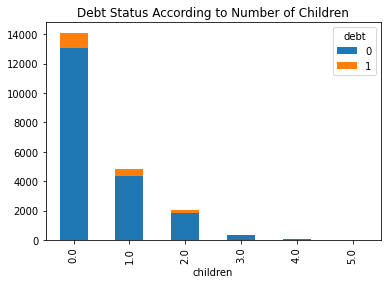

In [ ]:
# Visualize the debt status of loan applicants according to how many children they have

df.groupby(['children','debt']).size().unstack().plot(kind='bar',
                                                      stacked=True,
                                                      title="Debt Status According to Number of Children")

In [ ]:
# debt by number of children

# - count: actual number of loans taken by category
# - sum: actual number of loans not repaid by category
# - mean, %_debt_in_group: average amount and percentage of loans not repaid within category
# - %_distr_debtors: taking only applicants in debt, the percentage
#   distribution of loans not repaid by groups based on number of children 
# - %_debt_among_total_appl: percentage of loans not repaid amongst all loan applicants

t = df.pivot_table(index='children',
                   values='debt',
                   aggfunc=['count','sum','mean']).reset_index()

t['%_debt_in_group'] = t['mean'] * 100
t['%_distr_debtors'] = t['sum'] / t['sum'].sum() * 100
t['%_debt_among_total_appl'] = (t['sum'] / t['count'].sum() * 100)
t.sort_values('%_distr_debtors', ascending = False)

,children,count,sum,mean,%_debt_in_group,%_distr_debtors,%_debt_among_total_appl
,,debt,debt,debt,,,
0,0.0,14107,1063,0.075353,7.535266,61.374134,4.979389
1,1.0,4809,444,0.092327,9.232689,25.635104,2.079820
2,2.0,2052,194,0.094542,9.454191,11.200924,0.908750
3,3.0,330,27,0.081818,8.181818,1.558891,0.126476
4,4.0,41,4,0.097561,9.756098,0.230947,0.018737
5,5.0,9,0,0.000000,0.000000,0.000000,0.000000


### Conclusion
 * There is a pattern among the total number of applicants that there is higher debt with less number of children.  There is less debt with higher number of children. 

 * Applicants in the group with the highest number of children have better rate of repayment in all perspectives - within themselves, amongst other family status groups and compared to all applicants. However, there are much fewer applicants in this category overall.

* Eye catching is that those applicants with 5 children have no debt at all.

* Upon reflection on the rate of repayment amongst the categories themselves, applicants with 0 children have the second best rate of repayment. Interestingly, they do have the highest percentage of debt amongst the children categories but they also have the highest number of loans taken. 

- Is there a relation between marital status and repaying a loan on time?

In [ ]:

df2 = df.groupby(['family_status','debt'])


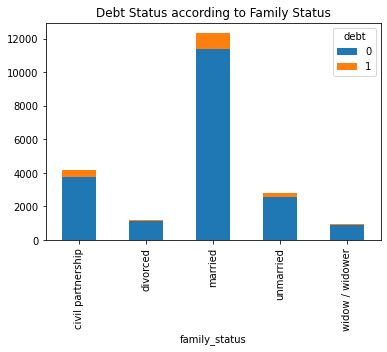

In [ ]:
# Visualize the debt status of loan applicants according to family status
df.groupby(['family_status','debt']).size().unstack().plot(kind='bar',
                                                           stacked=True,
                                                           title="Debt Status according to Family Status")



In [ ]:
# debt by family status

# - count: actual number of loans taken by category
# - sum: actual number of loans not repaid by category
# - mean, %_debt_in_group: average amount and percentage of loans not repaid within category
# - %_distr_debtors: taking only applicants in debt, the percentage
#   distribution of loans not repaid by groups of family status 
# - %_debt_among_total_appl: percentage of loans not repaid amongst all loan applicants

t = df.pivot_table(index='family_status',
                   values='debt',
                   aggfunc=['count','sum','mean']).reset_index()

t['%_debt_in_group'] = t['mean'] * 100
t['%_distr_debtors'] = t['sum'] / t['sum'].sum() * 100
t['%_debt_among_total_appl'] = (t['sum'] / t['count'].sum() * 100)
t.sort_values('%_debt_in_group', ascending = True)

,family_status,count,sum,mean,%_debt_in_group,%_distr_debtors,%_debt_among_total_appl
,,debt,debt,debt,,,
4,widow / widower,959,63,0.065693,6.569343,3.618610,0.293419
1,divorced,1195,85,0.071130,7.112971,4.882252,0.395883
2,married,12344,931,0.075421,7.542126,53.475014,4.336081
0,civil partnership,4163,388,0.093202,9.320202,22.286043,1.807089
3,unmarried,2810,274,0.097509,9.750890,15.738082,1.276140


### Conclusion

* There is a pattern among those who have been officially married and those who have not.

* Unmarried and civil partnerships have a higher rate of debt than compared to those who are married, divorced or widowed when looking at average debt within each category.

* Out of the total number of applicants, married ones do have the highest debt rate, but they also have the highest number of loans.

* The lowest debt rate in all perspectives - within themselves, amongst other family status groups and compared to all applicants - is in the widow/widower group. However, there are much fewer applicants in this category overall.

- Is there a relation between income level and repaying a loan on time?

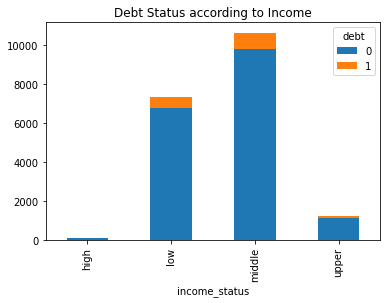

In [ ]:
# Visualize the debt status of loan applicants according to income_status
# 'low' = 0 < income < 20000
# 'middle'=  20000 <= income < 50000:
# 'upper' =  50000 <= income < 100000:
# 'high' =   income >= 100000 

df.groupby(['income_status','debt']).size().unstack().plot(kind='bar',stacked=True,title="Debt Status according to Income")

In [ ]:
# debt per income level

# income_status:
# 'low' = 0 < income < 20000
# 'middle'=  20000 <= income < 50000:
# 'upper' =  50000 <= income < 100000:
# 'high' =   income >= 100000  
 
# - count: actual number of loans taken by category
# - sum: actual number of loans not repaid by category
# - mean, %_debt_in_group: average amount and percentage of loans not repaid within category
# - %_distr_debtors: taking only applicants in debt, the percentage
#   distribution of loans not repaid by groups of income_status 
# - %_debt_among_total_appl: percentage of loans not repaid amongst all loan applicants

t = df.pivot_table(index='income_status',
                   values='debt',
                   aggfunc=['count','sum','mean']).reset_index()

t['%_debt_in_group'] = t['mean'] * 100
t['%_distr_debtors'] = t['sum'] / t['sum'].sum() * 100
t['%_debt_among_total_appl'] = (t['sum'] / t['count'].sum() * 100)
t.sort_values('%_distr_debtors', ascending = False)

,income_status,count,sum,mean,%_debt_in_group,%_distr_debtors,%_debt_among_total_appl
,,debt,debt,debt,,,
2,middle,10662,871,0.081692,8.169199,55.442393,4.501059
1,low,7369,608,0.082508,8.250780,38.701464,3.141956
3,upper,1221,86,0.070434,7.043407,5.474220,0.444421
0,high,99,6,0.060606,6.060606,0.381922,0.031006


### Conclusion

 * The pattern of debt for the income ranges is similar in each perspective: looking at debt within each category, comparing debt of categories to one another, and looking at debt amongst total applicants. 
  * Middle has highest debt and highest number of loans
  * then low, with exception of having higher debt average for its group
  * then upper
  * with least amount by high range, as well as least number of loans taken
 * The low and middle class have the greater number of loans, so it is believable that they will have higher number of loans not repaid.

- How do different loan purposes affect on-time repayment of the loan?

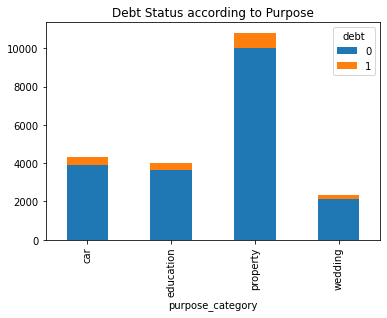

In [ ]:
# Visualize the debt status of loan applicants according to purpose of loan
df.groupby(['purpose_category','debt']).size().unstack().plot(kind='bar',stacked=True,title="Debt Status according to Purpose")

In [ ]:
# debt according to purpose of loan

# - count: actual number of loans taken by category
# - sum: actual number of loans not repaid by category
# - mean, %_debt_in_group: average amount and percentage of loans not repaid per category
# - %_distr_debtors: taking only applicants in debt, the percentage
#   distribution of loans not repaid by categories of purpose 
# - %_debt_among_total_appl: percentage of loans not repaid amongst all loan applicants

t = df.pivot_table(index='purpose_category',
                   values='debt',
                   aggfunc=['count','sum','mean']).reset_index()

t['%_debt_in_group'] = t['mean'] * 100
t['%_distr_debtors'] = t['sum'] / t['sum'].sum() * 100
t['%_debt_among_total_appl'] = (t['sum'] / t['count'].sum() * 100)
t.sort_values('%_debt_in_group')

,purpose_category,count,sum,mean,%_debt_in_group,%_distr_debtors,%_debt_among_total_appl
,,debt,debt,debt,,,
2,property,10814,782,0.072314,7.231367,44.916715,3.642122
3,wedding,2335,186,0.079657,7.965739,10.683515,0.866285
1,education,4014,370,0.092177,9.217738,21.252154,1.723255
0,car,4308,403,0.093547,9.354689,23.147616,1.876950


### Conclusion

 * Property has the lowest average of debt amongst groups but it has the highest percentage of loan debts between the groups and overall. It also has the highest number of loans taken out. 
  * Interestingly, when looking at total number of applicants, property loans have the highest rate of default, yet they also have the highest number of loans.
 * Car and education have very similar rates of debts to each other throughout all perspectives: the average rate of debt for its group, percentage of debt amongst all purpose categories and amongst all loan applicants. They have the highest rate of debt average compared to averages of other groups.
 * Wedding has a consistently low rate of debt by average, amongst all debtors by purpose category, and overall applications.


### Step 4. General conclusion

In [ ]:
# organize applicants in pivot table t with multiple categories to get sense of debt

# count: number of loan applicants with same situation:
#   -purpose, income, num of children, family status
# sum: number of loan applicants who did not repay loan in this grouping
# mean, %_debt_in_group: average of loans not repaid among this grouping
# %_total_appl: percentage of loans taken forby this grouping compared to all loan applicants

t = df.pivot_table(index=['purpose_category','income_status','children','family_status'],
                   values='debt',
                   aggfunc=['count','sum','mean']).reset_index()
t['%_debt_in_group'] = t['mean'] * 100
t['%_total_appl'] = t['count']/t['count'].sum() * 100

In [ ]:
# Applicants with lowest debt within grouping that have highest loan applications

# First 10 rows of pivot table t sorted by
# lowest debt within its grouping
# and highest percentage of loan applications, which also correlates to highest
# number of loan applicants

t.sort_values(['%_debt_in_group', '%_total_appl'], ascending=[1,0]).head(10)



,purpose_category,income_status,children,family_status,count,sum,mean,%_debt_in_group,%_total_appl
,,,,,debt,debt,debt,,
95,education,middle,1.0,divorced,26,0,0.0,0.0,0.135135
143,property,low,1.0,widow / widower,23,0,0.0,0.0,0.119543
113,education,upper,0.0,unmarried,22,0,0.0,0.0,0.114345
13,car,low,1.0,divorced,20,0,0.0,0.0,0.103950
168,property,middle,2.0,divorced,19,0,0.0,0.0,0.098753
210,wedding,middle,3.0,civil partnership,16,0,0.0,0.0,0.083160
49,car,upper,0.0,divorced,12,0,0.0,0.0,0.062370
147,property,low,2.0,unmarried,11,0,0.0,0.0,0.057173
187,property,upper,1.0,divorced,11,0,0.0,0.0,0.057173


In [ ]:
# The number of combinations of categories where applicants have zero debt

t[(t['%_debt_in_group'] == 0)]['%_debt_in_group'].count()

91

In [ ]:
# Applicants with highest average debt amongst its grouping sorted then by the
# number of loan applications

# First 20 rows of pivot table t sorted by
# highest average debt within its grouping
# and highest percentage of loan applications, which also correlates to highest
# number of loan applicants
t.sort_values(['%_debt_in_group', '%_total_appl'], ascending=[0,0]).head(20)

,purpose_category,income_status,children,family_status,count,sum,mean,%_debt_in_group,%_total_appl
,,,,,debt,debt,debt,,
65,education,high,0.0,unmarried,1,1,1.000000,100.000000,0.005198
155,property,low,4.0,unmarried,1,1,1.000000,100.000000,0.005198
175,property,middle,3.0,unmarried,1,1,1.000000,100.000000,0.005198
195,property,upper,2.0,widow / widower,1,1,1.000000,100.000000,0.005198
205,wedding,low,3.0,civil partnership,8,4,0.500000,50.000000,0.041580
63,education,high,0.0,civil partnership,2,1,0.500000,50.000000,0.010395
104,education,middle,3.0,civil partnership,2,1,0.500000,50.000000,0.010395
191,property,upper,2.0,civil partnership,5,2,0.400000,40.000000,0.025988
41,car,middle,2.0,unmarried,11,4,0.363636,36.363636,0.057173


In [ ]:
# calculate percentage of debt

print('% of applicants that have repaid loan: {:.0%}'.format(df[df['debt']==0]['debt'].count() / df['debt'].count()))
print('% of applicants that have NOT repaid loan: {:.0%}'.format(df[df['debt']==1]['debt'].count() / df['debt'].count()))

% of applicants that have repaid loan: 92%
% of applicants that have NOT repaid loan: 8%


* 92% of loans have been repaid
* 8% of loans have not been repaid


 * The following categories have the lowest debt rates:
   * applicants with 5 children
   * widowers
   * applicants with high range income
   * those who want to use loan for property.

* Looking at categories within individual columns, a common pattern was many columns with relatively low debt averages within their type had the highest debt amount overall; they generally also had the highest number of loans as compared to other categories within the column.

* Further Investigation:
  * analysis needs to be done to look at patterns of multiple combinations that may be helpful.

 * Applicant with lowest debt
   *  Looking at data of 91 Applicants with zero debt, the applicants spanned many categories.  The patterns observed by looking at each column individually does not reflect when combining multiple columns together.

 * Highest Debt
   * Those with the highest rate of debt have been given the least number of loans.  Since there are only 4 records of delinquency for these multiple column combinations, these applicants do not reflect the broader number of applicants.  
  






### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [-]  an explanation of how the blanks are filled;
- [-]  replaced the real data type with an integer;
- [-]  an explanation of WHY NOT TO change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.